<a href="https://colab.research.google.com/github/mahapara2411/devopsgit/blob/main/CLV_using_different_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Understanding**

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import io
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


%matplotlib inline
import matplotlib
import calendar

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Retail_Dataset.xlsx to Retail_Dataset.xlsx


In [2]:
df = pd.read_excel("Retail_Dataset.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"]) #reading the excel file #reading the excel file#

In [3]:
df1 = df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

In [4]:
df = df1.append(df2)

In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   CustomerID   824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [7]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
CustomerID     243007
Country             0
dtype: int64

In [8]:
# first drop the rows where the description is null
df.dropna(axis = 0, subset = ["Description"], inplace = True)

In [9]:
# We have to drop the rows where customer ID is null because it's a unique customer ID of each customer
# So it's better to drop rather than imputing it with some random value

df.dropna(axis = 0, subset = ["CustomerID"], inplace = True)

In [10]:
df.isnull().sum() #Now's there is no null values available in our data

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

In [11]:
df[df["Quantity"] <=0]
print ("Length of data with negative quantity: " + str(len(df.index)))
df.head()

Length of data with negative quantity: 824364


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [12]:
df[df["Price"] <=0]
print ("Length of data with negative price: " + str(len(df.index)))
df.head()

Length of data with negative price: 824364


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [13]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   CustomerID   824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB


In [14]:
df[['Country','CustomerID']].drop_duplicates()

,Country,CustomerID
0,United Kingdom,13085.0
12,United Kingdom,13078.0
31,United Kingdom,15362.0
54,United Kingdom,18102.0
71,France,12682.0
...,...,...
533812,United Kingdom,15195.0
536969,United Kingdom,13436.0
537255,United Kingdom,15520.0
538064,United Kingdom,13298.0


In [15]:
df.describe()

,Quantity,Price,CustomerID
count,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504
std,188.976099,70.241388,1697.464450
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13975.000000
50%,5.000000,1.950000,15255.000000
75%,12.000000,3.750000,16797.000000
max,80995.000000,38970.000000,18287.000000


**Exploratory Analysis and Visualization**

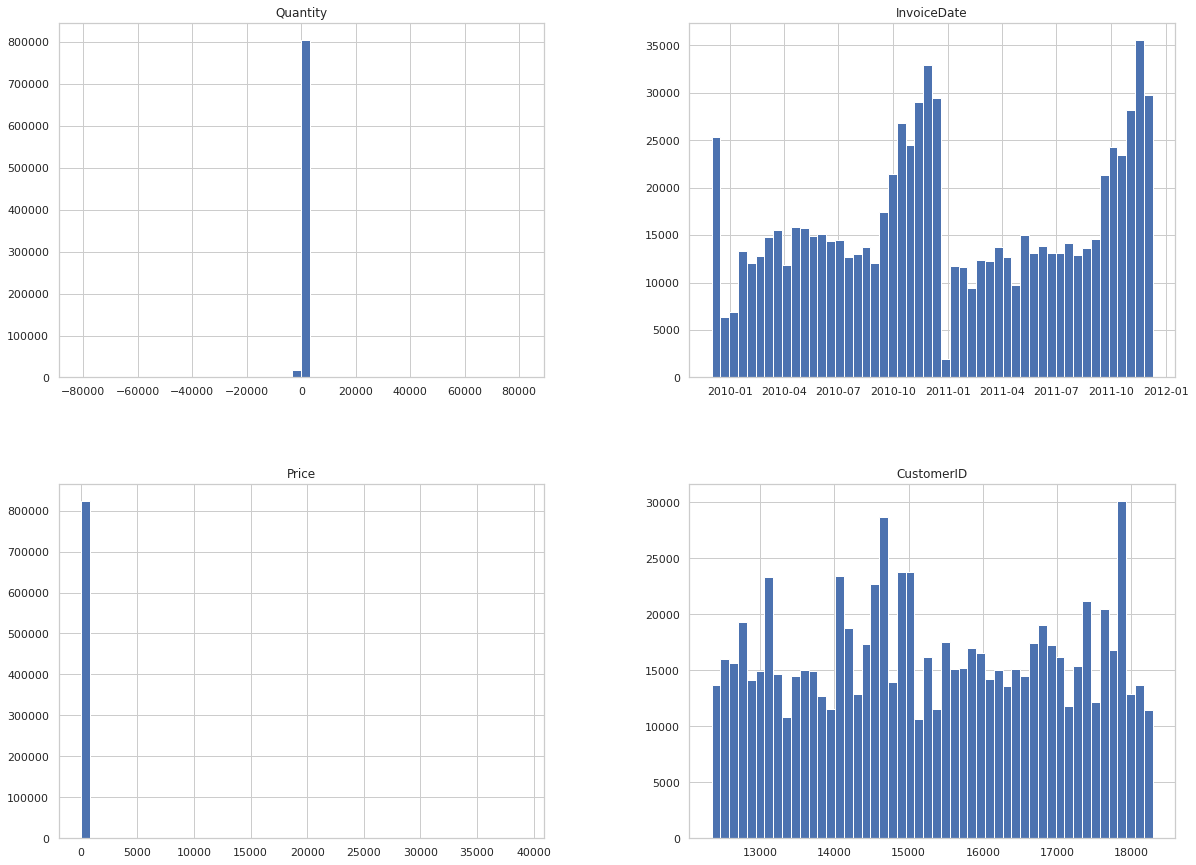

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [17]:
df['Quantity'].describe()

count    824364.000000
mean         12.414574
std         188.976099
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.874e+04]),
 array([-8.09950e+04, -7.28956e+04, -6.47962e+04, -5.66968e+04,
        -4.85974e+04, -4.04980e+04, -3.23986e+04, -2.42992e+04,
        -1.61998e+04, -8.10040e+03, -1.00000e+00]),
 <a list of 10 Patch objects>)

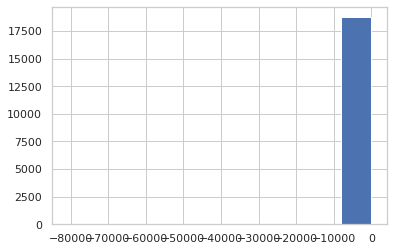

In [18]:
plt.hist(df['Quantity'][df['Quantity']<0])

In [19]:
df['Price'].describe()

count    824364.000000
mean          3.676800
std          70.241388
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: Price, dtype: float64

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

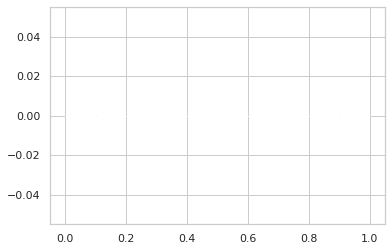

In [20]:
plt.hist(df['Price'][df['Price']<0])

In [21]:
# find out correlation between params
df.corr()

,Quantity,Price,CustomerID
Quantity,1.000000,-0.001917,-0.005430
Price,-0.001917,1.000000,-0.003835
CustomerID,-0.005430,-0.003835,1.000000


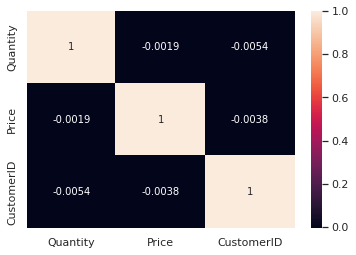

In [22]:
sns.heatmap(df.corr(),annot=True)

In [23]:
df3 = df.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   CustomerID   824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB


In [24]:
df3 = df3.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   CustomerID   824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB


In [25]:
df3['Quantity'][df3['Quantity']<=0] = None
df3['Quantity'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    805620.000000
mean         13.307665
std         144.306739
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

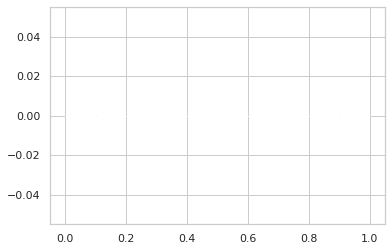

In [26]:
plt.hist(df3['Quantity'][df3['Quantity']<=0])

In [27]:
df3['Price'][df3['Price']<=0] = None
df3['Price'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    824293.000000
mean          3.677116
std          70.244404
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: Price, dtype: float64

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

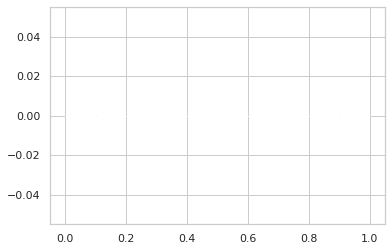

In [28]:
plt.hist(df3['Price'][df3['Price']<=0])

In [29]:
df3= df3.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805549 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805549 non-null  object        
 1   StockCode    805549 non-null  object        
 2   Description  805549 non-null  object        
 3   Quantity     805549 non-null  float64       
 4   InvoiceDate  805549 non-null  datetime64[ns]
 5   Price        805549 non-null  float64       
 6   CustomerID   805549 non-null  float64       
 7   Country      805549 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 55.3+ MB


In [30]:
df3.drop(['StockCode','Description'], axis=1, inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805549 entries, 0 to 541909
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805549 non-null  object        
 1   Quantity     805549 non-null  float64       
 2   InvoiceDate  805549 non-null  datetime64[ns]
 3   Price        805549 non-null  float64       
 4   CustomerID   805549 non-null  float64       
 5   Country      805549 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 43.0+ MB


In [31]:
df3.head()

,Invoice,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [32]:
df3=df3.rename(columns={'CustomerID': 'ID_OF_CUSTOMER', 'Invoice': 'NUMBER_OF_INVOICE',
                       'InvoiceDate': 'DATE_OF_INVOICE', 'Quantity': 'QUANTITY',
                       'Price': 'PRICE_OF_UNIT'})
df3.head()

,NUMBER_OF_INVOICE,QUANTITY,DATE_OF_INVOICE,PRICE_OF_UNIT,ID_OF_CUSTOMER,Country
0,489434,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


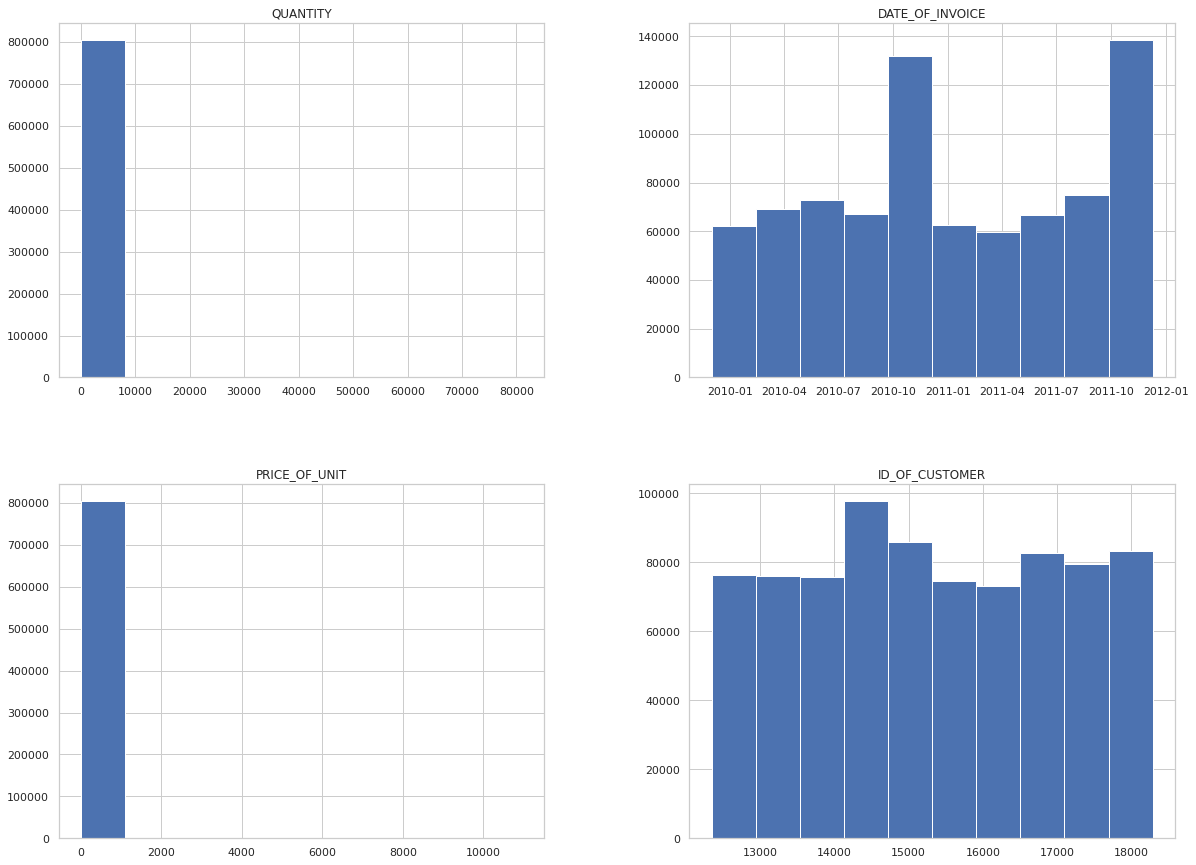

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
df3.hist(bins=10, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

**Exploring how much each country sold**

In [34]:
df3['Sales'] = df3['QUANTITY']*df3['PRICE_OF_UNIT']
df3['Sales']=df3['Sales'].astype('int64')

In [35]:
top_sales_country = pd.DataFrame(data={'Country':df3['Country'],'Sales':df3['Sales']})
top_sales_country = top_sales_country.groupby('Country').sum().reset_index()

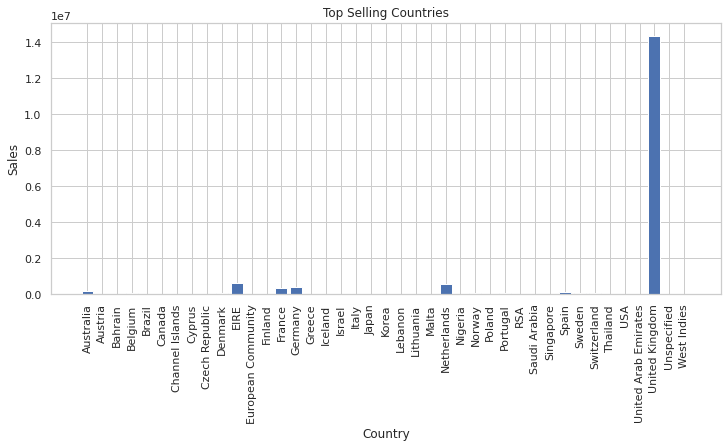

In [36]:
plt.figure(figsize=(12,5))
plt.bar(top_sales_country['Country'],top_sales_country['Sales'])
plt.title('Top Selling Countries')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.xticks(rotation = 'vertical');

**Monthly sales analysis**

In [37]:
df3['DATE_OF_INVOICE'] = pd.to_datetime(df3['DATE_OF_INVOICE'])
df3

,NUMBER_OF_INVOICE,QUANTITY,DATE_OF_INVOICE,PRICE_OF_UNIT,ID_OF_CUSTOMER,Country,Sales
0,489434,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83
1,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81
2,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81
3,489434,48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100
4,489434,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30
...,...,...,...,...,...,...,...
541905,581587,6.0,2011-12-09 12:50:00,2.10,12680.0,France,12
541906,581587,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16
541907,581587,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16
541908,581587,3.0,2011-12-09 12:50:00,4.95,12680.0,France,14


In [38]:
df3['Month'] = pd.DatetimeIndex(df3['DATE_OF_INVOICE']).month
df3

,NUMBER_OF_INVOICE,QUANTITY,DATE_OF_INVOICE,PRICE_OF_UNIT,ID_OF_CUSTOMER,Country,Sales,Month
0,489434,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83,12
1,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81,12
2,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81,12
3,489434,48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100,12
4,489434,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30,12
...,...,...,...,...,...,...,...,...
541905,581587,6.0,2011-12-09 12:50:00,2.10,12680.0,France,12,12
541906,581587,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16,12
541907,581587,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16,12
541908,581587,3.0,2011-12-09 12:50:00,4.95,12680.0,France,14,12


In [39]:
monthly_data_df = df3.groupby('Month').sum().reset_index()
monthly_data_df

,Month,QUANTITY,PRICE_OF_UNIT,ID_OF_CUSTOMER,Sales
0,1,720019.0,151923.362,6.541459e+08,1105701
1,2,638383.0,137912.206,6.603310e+08,932115
2,3,851969.0,214016.841,9.100045e+08,1265574
3,4,644247.0,166971.193,7.625041e+08,1039217
4,5,759898.0,193938.780,8.696185e+08,1250376
5,6,755373.0,186399.780,8.964711e+08,1271234
6,7,695075.0,166212.821,8.254153e+08,1164911
7,8,851702.0,162092.740,8.190225e+08,1223519
8,9,1113509.0,235589.873,1.140796e+09,1748843
9,10,1192423.0,327326.380,1.514180e+09,2027753


In [40]:
monthly_data_df['Month'] =monthly_data_df['Month'].transform(lambda x: calendar.month_name[x])
monthly_data_df['Month']

0       January
1      February
2         March
3         April
4           May
5          June
6          July
7        August
8     September
9       October
10     November
11     December
Name: Month, dtype: object

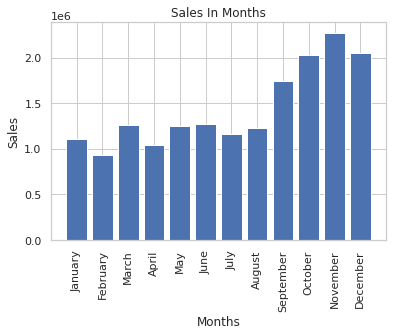

In [41]:
plt.bar(monthly_data_df['Month'],monthly_data_df['Sales'])
plt.xticks(range(0,12),rotation='vertical')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Sales In Months')
plt.show()

**Monthly - Daily Sales Analysis**

In [42]:
day_data_df = df3.copy()
day_data_df['Day'] = pd.DatetimeIndex(day_data_df['DATE_OF_INVOICE']).day
day_data_df

,NUMBER_OF_INVOICE,QUANTITY,DATE_OF_INVOICE,PRICE_OF_UNIT,ID_OF_CUSTOMER,Country,Sales,Month,Day
0,489434,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83,12,1
1,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81,12,1
2,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81,12,1
3,489434,48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100,12,1
4,489434,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30,12,1
...,...,...,...,...,...,...,...,...,...
541905,581587,6.0,2011-12-09 12:50:00,2.10,12680.0,France,12,12,9
541906,581587,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16,12,9
541907,581587,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16,12,9
541908,581587,3.0,2011-12-09 12:50:00,4.95,12680.0,France,14,12,9


In [43]:
day_data_df=day_data_df.groupby(['Month','Day']).sum().sort_values(['Month','Day']).reset_index()
day_data_df.drop(labels=['QUANTITY','PRICE_OF_UNIT','ID_OF_CUSTOMER'],axis=1,inplace=True)

In [44]:
day_data_arr = np.zeros((12,31))
for i in day_data_df.values:
    day_data_arr[i[0]-1][i[1]-1] = i[2]

In [45]:
ylabels = [calendar.month_name[i] for i in range(1,13)]

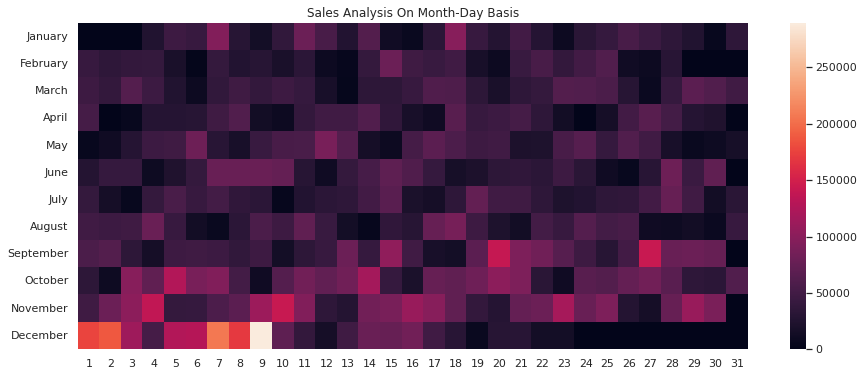

In [46]:
fig,ax = plt.subplots(figsize=(15,6))
plt.title('Sales Analysis On Month-Day Basis')
ax.set_xlabel('Days')
colormap = sns.color_palette("Greens")
sns.heatmap(day_data_arr,xticklabels=range(1,32),yticklabels=[calendar.month_name[i] for i in range(1,13)],label='Month',ax=ax);

**Hourly Sales Analysis**

In [47]:
hour_data_df = df3.copy()
hour_data_df['Hour'] = pd.DatetimeIndex(hour_data_df['DATE_OF_INVOICE']).hour

In [48]:
hour_data_df = hour_data_df.groupby('Hour').sum().reset_index().sort_values('Hour')

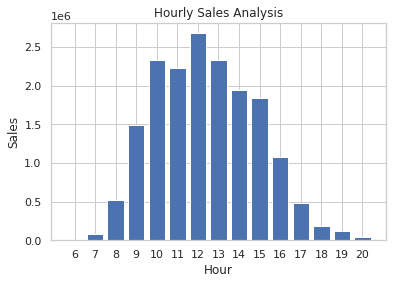

In [49]:
plt.bar(hour_data_df['Hour'],hour_data_df['Sales'])
plt.xticks(range(6,21))
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.title('Hourly Sales Analysis');

**Weekday Sales Analysis**

In [50]:
weekday_data_df = df3.copy()
weekday_data_df['Weekday'] = pd.DatetimeIndex(weekday_data_df['DATE_OF_INVOICE']).weekday

In [51]:
weekday_data_df = weekday_data_df.groupby('Weekday').sum().reset_index()

In [52]:
weekday_data_df['Weekday'] = weekday_data_df['Weekday'].transform(lambda x: calendar.day_name[x])

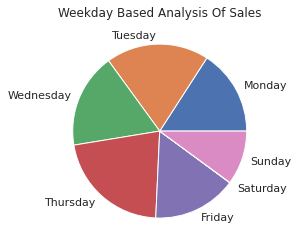

In [53]:
plt.pie(weekday_data_df['Sales'],labels=weekday_data_df['Weekday'])
plt.title('Weekday Based Analysis Of Sales');

**The top 5 countries in terms of sales**

In [54]:
top_sales_country = top_sales_country.sort_values(by='Sales',ascending=False).reset_index(drop=True)

In [55]:
top_sales_country['Country'].head()

0    United Kingdom
1              EIRE
2       Netherlands
3           Germany
4            France
Name: Country, dtype: object

**Top 3 months in terms of sales**

In [56]:
monthly_data_df = monthly_data_df.sort_values(by='Sales').reset_index(drop=True)
monthly_data_df['Month'].head(3)

0    February
1       April
2     January
Name: Month, dtype: object

**Best hours for sales or best time for advertising**

In [57]:
hour_data_df=hour_data_df.sort_values(by='Sales',ascending=False).reset_index(drop=True)

In [58]:
hour_data_df.head()

,Hour,QUANTITY,PRICE_OF_UNIT,ID_OF_CUSTOMER,Sales,Month
0,12,1664739.0,437021.471,2.226590e+09,2677621,1094864
1,13,1531061.0,410210.754,2.019197e+09,2334905,999130
2,10,1454242.0,246699.623,1.121033e+09,2326905,538385
3,11,1412836.0,330105.763,1.544418e+09,2221955,737722
4,14,1133047.0,349769.311,1.692337e+09,1940857,831748


**Best Weekdays in terms of sales**

In [59]:
weekday_data_df = weekday_data_df.sort_values(by='Sales',ascending=False).reset_index(drop=True)
weekday_data_df['Weekday'].head()

0     Thursday
1      Tuesday
2    Wednesday
3       Monday
4       Friday
Name: Weekday, dtype: object

In [60]:
# Calulate total purchase
df3['TOTAL_PURCHASE'] = df3['QUANTITY'] * df3['PRICE_OF_UNIT']
df3.head()

,NUMBER_OF_INVOICE,QUANTITY,DATE_OF_INVOICE,PRICE_OF_UNIT,ID_OF_CUSTOMER,Country,Sales,Month,TOTAL_PURCHASE
0,489434,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83,12,83.4
1,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81,12,81.0
2,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81,12,81.0
3,489434,48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100,12,100.8
4,489434,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30,12,30.0


In [61]:
# Converting Pandas Series to DateTime in a DataFrame
df3['DATE_OF_INVOICE']=pd.to_datetime(df3['DATE_OF_INVOICE'])
df3.head()

,NUMBER_OF_INVOICE,QUANTITY,DATE_OF_INVOICE,PRICE_OF_UNIT,ID_OF_CUSTOMER,Country,Sales,Month,TOTAL_PURCHASE
0,489434,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83,12,83.4
1,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81,12,81.0
2,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81,12,81.0
3,489434,48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100,12,100.8
4,489434,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30,12,30.0


In [62]:
# Extract month and year from InvoiceDate.
df3['MONTH_BY_YEAR'] = df3['DATE_OF_INVOICE'].apply(lambda x: x.strftime('%b-%Y'))
df3.head()

,NUMBER_OF_INVOICE,QUANTITY,DATE_OF_INVOICE,PRICE_OF_UNIT,ID_OF_CUSTOMER,Country,Sales,Month,TOTAL_PURCHASE,MONTH_BY_YEAR
0,489434,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83,12,83.4,Dec-2009
1,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81,12,81.0,Dec-2009
2,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81,12,81.0,Dec-2009
3,489434,48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100,12,100.8,Dec-2009
4,489434,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30,12,30.0,Dec-2009


In [63]:
SALES=df3.pivot_table(index=['ID_OF_CUSTOMER'],columns=['MONTH_BY_YEAR'],values='TOTAL_PURCHASE',aggfunc='sum',fill_value=0).reset_index()
SALES.head()

MONTH_BY_YEAR,ID_OF_CUSTOMER,Apr-2010,Apr-2011,Aug-2010,Aug-2011,Dec-2009,Dec-2010,Dec-2011,Feb-2010,Feb-2011,...,Mar-2010,Mar-2011,May-2010,May-2011,Nov-2010,Nov-2011,Oct-2010,Oct-2011,Sep-2010,Sep-2011
0,12346.0,0.00,0.00,0.0,0.00,113.5,0.00,0.00,0.0,0.0,...,27.05,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0
1,12347.0,0.00,636.25,0.0,584.91,0.0,1423.58,224.82,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,611.53,1294.32,0.00,0.0
2,12348.0,0.00,367.00,0.0,0.00,0.0,892.80,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,222.16,310.0
3,12349.0,1068.52,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,200.0,0.0,0.0,1757.55,1402.62,0.00,0.00,0.0
4,12350.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,334.4,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0


In [64]:
SALES['CLV']=SALES.iloc[:,2:].sum(axis=1)
SALES.head()

MONTH_BY_YEAR,ID_OF_CUSTOMER,Apr-2010,Apr-2011,Aug-2010,Aug-2011,Dec-2009,Dec-2010,Dec-2011,Feb-2010,Feb-2011,...,Mar-2011,May-2010,May-2011,Nov-2010,Nov-2011,Oct-2010,Oct-2011,Sep-2010,Sep-2011,CLV
0,12346.0,0.00,0.00,0.0,0.00,113.5,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,77556.46
1,12347.0,0.00,636.25,0.0,584.91,0.0,1423.58,224.82,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,611.53,1294.32,0.00,0.0,5633.32
2,12348.0,0.00,367.00,0.0,0.00,0.0,892.80,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,222.16,310.0,2019.40
3,12349.0,1068.52,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,...,0.0,200.0,0.0,0.0,1757.55,1402.62,0.00,0.00,0.0,3360.17
4,12350.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,334.4,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,334.40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


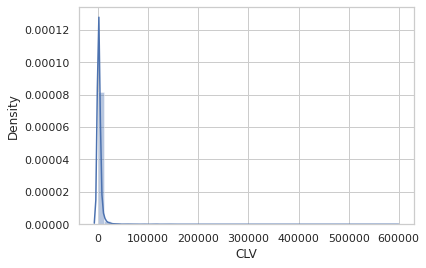

In [65]:
sns.distplot(SALES['CLV'],kde=True)

In [66]:
SALES['CLV'].describe()

count      5878.000000
mean       2917.458317
std       14389.798310
min           0.000000
25%         333.710000
50%         862.190000
75%        2220.007500
max      592225.100000
Name: CLV, dtype: float64

In [67]:
df4 = SALES[['ID_OF_CUSTOMER','Dec-2011','Nov-2011','Oct-2011','Sep-2011','Aug-2011','Jul-2011','CLV']]
df4.head()

MONTH_BY_YEAR,ID_OF_CUSTOMER,Dec-2011,Nov-2011,Oct-2011,Sep-2011,Aug-2011,Jul-2011,CLV
0,12346.0,0.00,0.00,0.00,0.0,0.00,0.0,77556.46
1,12347.0,224.82,0.00,1294.32,0.0,584.91,0.0,5633.32
2,12348.0,0.00,0.00,0.00,310.0,0.00,0.0,2019.40
3,12349.0,0.00,1757.55,0.00,0.0,0.00,0.0,3360.17
4,12350.0,0.00,0.00,0.00,0.0,0.00,0.0,334.40


In [68]:
df5 = pd.DataFrame({'ID_OF_CUSTOMER': SALES['ID_OF_CUSTOMER'],
                    'Dec-2011': SALES['Dec-2011'],
                    'Nov-2011': SALES['Nov-2011'],
                    'Oct-2011': SALES['Oct-2011'],
                    'Sep-2011': SALES['Sep-2011'],
                    'Aug-2011': SALES['Aug-2011'],
                    'Jul-2011': SALES['Jul-2011'],
                    'CLV': SALES['CLV']})
df5.head()

,ID_OF_CUSTOMER,Dec-2011,Nov-2011,Oct-2011,Sep-2011,Aug-2011,Jul-2011,CLV
0,12346.0,0.00,0.00,0.00,0.0,0.00,0.0,77556.46
1,12347.0,224.82,0.00,1294.32,0.0,584.91,0.0,5633.32
2,12348.0,0.00,0.00,0.00,310.0,0.00,0.0,2019.40
3,12349.0,0.00,1757.55,0.00,0.0,0.00,0.0,3360.17
4,12350.0,0.00,0.00,0.00,0.0,0.00,0.0,334.40


In [69]:
# find out correlation between params
df5.corr()

,ID_OF_CUSTOMER,Dec-2011,Nov-2011,Oct-2011,Sep-2011,Aug-2011,Jul-2011,CLV
ID_OF_CUSTOMER,1.000000,0.008867,-0.016271,-0.014471,0.008119,-0.020470,-0.007864,-0.009372
Dec-2011,0.008867,1.000000,0.111418,0.113410,0.083581,0.074546,0.073483,0.268572
Nov-2011,-0.016271,0.111418,1.000000,0.616020,0.674443,0.566028,0.509477,0.715616
Oct-2011,-0.014471,0.113410,0.616020,1.000000,0.562004,0.537468,0.539594,0.820019
Sep-2011,0.008119,0.083581,0.674443,0.562004,1.000000,0.467161,0.593568,0.750124
Aug-2011,-0.020470,0.074546,0.566028,0.537468,0.467161,1.000000,0.271539,0.652592
Jul-2011,-0.007864,0.073483,0.509477,0.539594,0.593568,0.271539,1.000000,0.717806
CLV,-0.009372,0.268572,0.715616,0.820019,0.750124,0.652592,0.717806,1.000000


In [70]:
corr_matrix = df5.corr()
corr_matrix["CLV"].sort_values(ascending=False)

CLV               1.000000
Oct-2011          0.820019
Sep-2011          0.750124
Jul-2011          0.717806
Nov-2011          0.715616
Aug-2011          0.652592
Dec-2011          0.268572
ID_OF_CUSTOMER   -0.009372
Name: CLV, dtype: float64

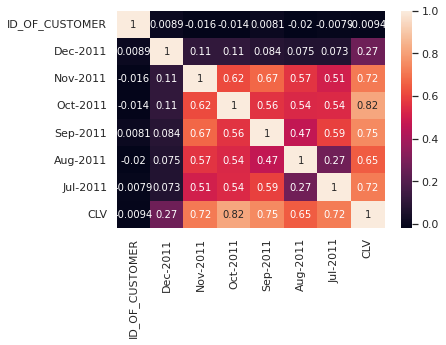

In [71]:
sns.heatmap(df5.corr(),annot=True)

**Modeling**

In [72]:
df5.columns

Index(['ID_OF_CUSTOMER', 'Dec-2011', 'Nov-2011', 'Oct-2011', 'Sep-2011',
       'Aug-2011', 'Jul-2011', 'CLV'],
      dtype='object')

In [73]:
X = df5[ ['Dec-2011', 'Nov-2011', 'Oct-2011', 'Sep-2011','Aug-2011','Jul-2011'] ]
y = df5[ ['CLV']]

In [74]:
clv_features = [X for i,X in enumerate(X.columns) if i!=6]

In [75]:
import statsmodels.api as st
X1 = st.add_constant(X)
reg_model=st.OLS(y,X1)
result=reg_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.904      
Dependent Variable: CLV              AIC:                115488.1413
Date:               2022-07-24 07:20 BIC:                115534.8941
No. Observations:   5878             Log-Likelihood:     -57737.    
Df Model:           6                F-statistic:        9191.      
Df Residuals:       5871             Prob (F-statistic): 0.00       
R-squared:          0.904            Scale:              1.9944e+07 
---------------------------------------------------------------------
               Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
---------------------------------------------------------------------
const         409.2904   59.7483   6.8502  0.0000  292.1618  526.4191
Dec-2011        1.0626    0.0263  40.4147  0.0000    1.0111    1.1142
Nov-2011        0.5978    0.0955   6.2596  0.0000    0.4106    0.7851
Oct-2011        4.5619    0.0715  63.7655  0.00

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [78]:
X_train1 = st.add_constant(X_train)
reg_model=st.OLS(y_train,X_train1)
result=reg_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    CLV   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     3379.
Date:                Sun, 24 Jul 2022   Prob (F-statistic):               0.00
Time:                        07:20:48   Log-Likelihood:                -38282.
No. Observations:                3938   AIC:                         7.658e+04
Df Residuals:                    3931   BIC:                         7.662e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        632.3520     66.413      9.522      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [79]:
print("Precision of linear regression on training set: {:.3f}".format(regressor.score(X_train, y_train)))
print("Precision of linear regression on test set: {:.3f}".format(regressor.score(X_test, y_test)))

Precision of linear regression on training set: 0.838
Precision of linear regression on test set: 0.863


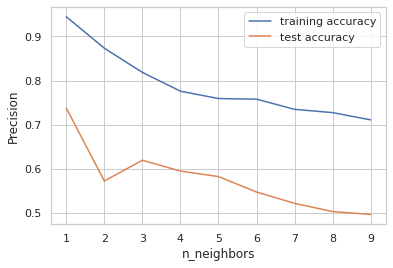

In [80]:
from sklearn.neighbors import KNeighborsRegressor
training_precision = []
test_precision = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 10)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set precision
    training_precision.append(knn.score(X_train, y_train))
    # record test set precision
    test_precision.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_precision, label="training accuracy")
plt.plot(neighbors_settings, test_precision, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [81]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
print("Precision of K-NN regressor on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Precision of K-NN regressor on test set: {:.3f}".format(knn.score(X_test, y_test)))

Precision of K-NN regressor on training set: 0.759
Precision of K-NN regressor on test set: 0.582


In [82]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [83]:
print("Precision of support vector regressor on training set: {:.2f}".format(svr.score(X_train, y_train)))
print("Precision of support vector regressor on test set: {:.2f}".format(svr.score(X_test, y_test)))

Precision of support vector regressor on training set: -0.03
Precision of support vector regressor on test set: -0.01


In [84]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [85]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.23004939 0.09053554 0.03118742 0.05929692 0.53402975 0.05490098]


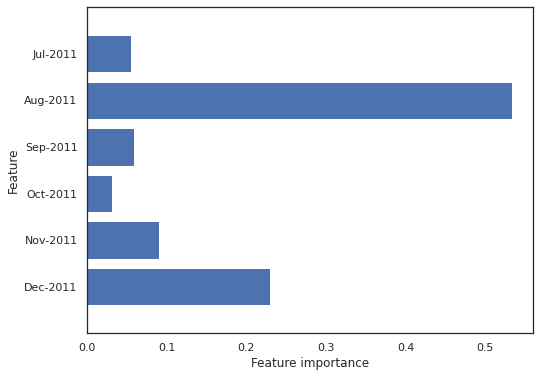

In [86]:
sns.set(style="white")

def plot_feature_importances_clv(model):
    plt.figure(figsize=(8,6))
    n_features = 6
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), clv_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_clv(dt)

In [87]:
print("Precision of decision tree regressor on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Precision of decision tree regressor on test set: {:.3f}".format(dt.score(X_test, y_test)))

Precision of decision tree regressor on training set: 0.948
Precision of decision tree regressor on test set: 0.399


In [88]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=42)

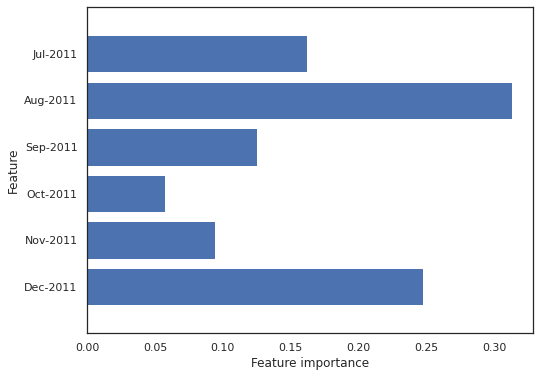

In [89]:
plot_feature_importances_clv(rf)

In [90]:
print("Precision of random forest regressor on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Precision of random forest regressor on test set: {:.3f}".format(rf.score(X_test, y_test)))

Precision of random forest regressor on training set: 0.910
Precision of random forest regressor on test set: 0.535


In [91]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

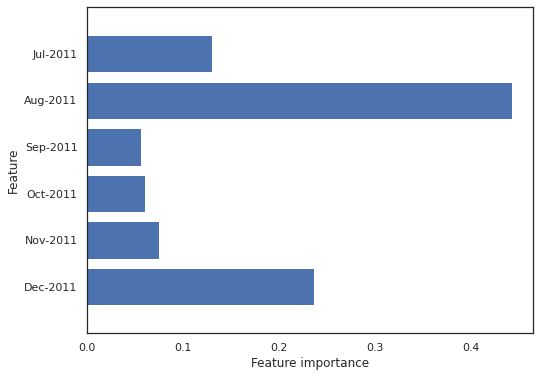

In [92]:
plot_feature_importances_clv(gb)

In [93]:
print("Precision of gradient boosting regressor on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Precision of gradient boosting regressor test set: {:.3f}".format(gb.score(X_test, y_test)))

Precision of gradient boosting regressor on training set: 0.924
Precision of gradient boosting regressor test set: 0.537


**Evaluation**

In [94]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [95]:
y_pred_regressor = regressor.predict(X_test)

In [96]:
regressor_r = regressor.score(X_test, y_test)
print("Linear Regression R squared:","{:.2%}".format(regressor_r))

Linear Regression R squared: 86.29%


In [97]:
regressor_mse = mean_squared_error(y_pred_regressor, y_test)
regressor_rmse = np.sqrt(regressor_mse)
print('Linear Regression RMSE: %.4f' % regressor_rmse)

Linear Regression RMSE: 7624.6254


In [98]:
y_pred_knn = knn.predict(X_test)

In [99]:
knn_r = knn.score(X_test, y_test)
print("K-Nearest Neighbors R squared:","{:.2%}".format(knn_r))

K-Nearest Neighbors R squared: 58.21%


In [100]:
knn_mse = mean_squared_error(y_pred_knn, y_test)
knn_rmse = np.sqrt(knn_mse)
print('K-Nearest Neighbors RMSE: %.4f' % knn_rmse)

K-Nearest Neighbors RMSE: 13310.0902


In [101]:
y_pred_svr = svr.predict(X_test)

In [102]:
svr_r = svr.score(X_test, y_test)
print("Support Vector Machine R squared:","{:.2%}".format(svr_r))

Support Vector Machine R squared: -1.14%


In [103]:
svr_mse = mean_squared_error(y_pred_svr, y_test)
svr_rmse = np.sqrt(svr_mse)
print('Support Vector Machine RMSE: %.4f' % svr_rmse)

Support Vector Machine RMSE: 20706.1530


In [104]:
y_pred_dt = dt.predict(X_test)

In [105]:
dt_r = dt.score(X_test, y_test)
print("Decision Tree R squared:","{:.2%}".format(dt_r))

Decision Tree R squared: 39.89%


In [106]:
dt_mse = mean_squared_error(y_pred_dt, y_test)
dt_rmse = np.sqrt(dt_mse)
print('Decision Tree RMSE: %.4f' % dt_rmse)

Decision Tree RMSE: 15963.2796


In [107]:
y_pred_rf = rf.predict(X_test)

In [108]:
rf_r = rf.score(X_test, y_test)
print("Random Forest R squared:","{:.2%}".format(rf_r))

Random Forest R squared: 53.52%


In [109]:
rf_mse = mean_squared_error(y_pred_rf, y_test)
rf_rmse = np.sqrt(rf_mse)
print('Random Forest RMSE: %.4f' % rf_rmse)

Random Forest RMSE: 14036.7202


In [110]:
y_pred_gb = gb.predict(X_test)

In [111]:
gb_r = gb.score(X_test, y_test)
print("Gradient Boosting R squared:","{:.2%}".format(gb_r))

Gradient Boosting R squared: 53.67%


In [112]:
gb_mse = mean_squared_error(y_pred_gb, y_test)
gb_rmse = np.sqrt(gb_mse)
print('Gradient Boosting RMSE: %.4f' % gb_rmse)

Gradient Boosting RMSE: 14014.8721


In [113]:
models = ['Linear Regression','K-Nearest Neighbors', 
          'Support Vector Machine', 'Decision Tree',
          'Random Forest', 'Gradient Boosting']
tests_rmse = [regressor_rmse, knn_rmse, svr_rmse, dt_rmse, rf_rmse, gb_rmse]
tests_r = [regressor_r, knn_r, svr_r, dt_r, rf_r, gb_r]

In [114]:
compare_models = pd.DataFrame({ "Algorithms": models, "Tests RMSE": tests_rmse })
compare_models.sort_values(by = "Tests RMSE", ascending = True)

,Algorithms,Tests RMSE
0,Linear Regression,7624.625358
1,K-Nearest Neighbors,13310.090242
5,Gradient Boosting,14014.872058
4,Random Forest,14036.720202
3,Decision Tree,15963.279561
2,Support Vector Machine,20706.152997


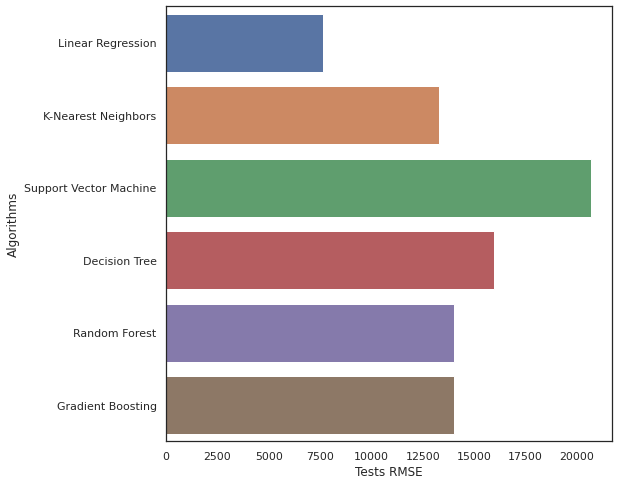

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests RMSE", y = "Algorithms", data = compare_models)
plt.show()

In [116]:
compare_models = pd.DataFrame({ "Algorithms": models, "Tests R Squared": tests_r  })
compare_models.sort_values(by = "Tests R Squared", ascending = False)

,Algorithms,Tests R Squared
0,Linear Regression,0.862860
1,K-Nearest Neighbors,0.582084
5,Gradient Boosting,0.536654
4,Random Forest,0.535208
3,Decision Tree,0.398866
2,Support Vector Machine,-0.011407


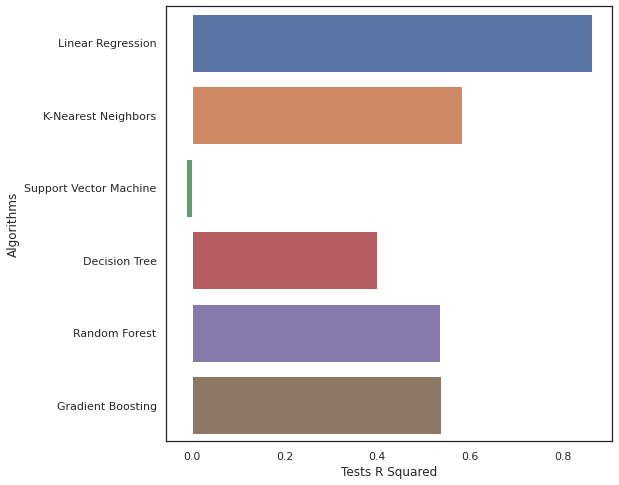

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests R Squared", y = "Algorithms", data = compare_models)
plt.show()

**Deployment**

In [118]:
a = float(input("Please enter the revenue from a customer one month ago:"))
b = float(input("Please enter the revenue from a customer two months ago:"))
c = float(input("Please enter the revenue from a customer three months ago :"))
d = float(input("Please enter the revenue from a customer four months ago:"))
e = float(input("Please enter the revenue from a customer five months ago :"))
f = float(input("Please enter the revenue from a customer six months ago:"))
new_data = np.array([a,b,c,d,e,f]).reshape(1,-1)
new_pred=regressor.predict(new_data)
new_pred1 = int(new_pred[0][0])

print("\033[1m The customer CLV is:", '${:,.0f}'.format(new_pred1))

Please enter the revenue from a customer one month ago:5643
Please enter the revenue from a customer two months ago:4421
Please enter the revenue from a customer three months ago :523
Please enter the revenue from a customer four months ago:7798
Please enter the revenue from a customer five months ago :211
Please enter the revenue from a customer six months ago:4009
 The customer CLV is: $46,202


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [119]:
ExpectedValue = new_pred1
ExpectedValue

46202

In [120]:
StandardError = int(regressor_rmse)
StandardError 

7624

In [121]:
import scipy.stats as si
def normsinv(x):
    x = si.norm.ppf(x)
    return (x)

In [122]:
alpha = 1 - 0.99
Z = round(abs(normsinv(0.5*alpha)),3)
Z

2.576

In [123]:
Upper = int(ExpectedValue + Z * StandardError)
Upper

65841

In [124]:
Lower = int(ExpectedValue - Z * StandardError)
Lower

26562

In [125]:
print("\033[1m With a confidence level of 99%, the CLV of the Customer is between " '${:,.0f}'.format(Lower),"and",'${:,.0f}.'.format(Upper),"The average value the CLV is " '${:,.0f}.'.format(ExpectedValue))

 With a confidence level of 99%, the CLV of the Customer is between $26,562 and $65,841. The average value the CLV is $46,202.
